In [ ]:
!nvidia-smi


NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


170500096/170498071 [==============================] - 3s 0us/step


In [ ]:
print(f'x_train.shape:\t{x_train.shape}\nx_test.shape:\t{x_test.shape}\ny_train.shape:\t{y_train.shape}\ny_test.shape:\t{y_test.shape}')


x_train.shape:	(50000, 32, 32, 3)
x_test.shape:	(10000, 32, 32, 3)
y_train.shape:	(50000, 1)
y_test.shape:	(10000, 1)


In [ ]:
# Model / data parameters
num_classes = 10
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
input_shape = (32, 32, 3) # width * height * depth (R + G + B)

In [ ]:
# normalise RGB values
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


Text(0.5, 0, '42629 : 4 / deer')

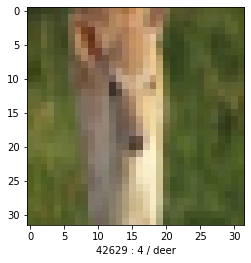

In [ ]:
i = np.random.randint(len(x_train))
plt.imshow(x_train[i])
plt.xlabel(f'{i} : {y_train[i][0]} / {classes[y_train[i][0]]}')


In [ ]:
# One hot encode the target vector
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[i])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
# Simple CNN that still performs decently well
# read more about layers https://keras.io/api/layers/
model = keras.Sequential(
 [
 keras.Input(shape=input_shape),
 layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
 layers.MaxPooling2D(pool_size=(2, 2)),
 layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
 layers.MaxPooling2D(pool_size=(2, 2)),
 layers.Flatten(),
 layers.Dropout(0.5),
 layers.Dense(256, activation="softmax"),
 layers.Dense(num_classes, activation="softmax"),
 ]
)
# read more about loss functions https://keras.io/api/losses/
# read more about optimizers https://keras.io/api/optimizers/
# read more about metrics https://keras.io/api/metrics/
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# print a report
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 256)       7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dropout (Dropout)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

In [ ]:
# Training "loop"
batch_size = 16
epochs = 16
import gc
# this is why keras is simple
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
gc.collect()


Epoch 1/16
2500/2500 [==============================] - 446s 178ms/step - loss: 2.1995 - accuracy: 0.1830 - val_loss: 1.9504 - val_accuracy: 0.2610
Epoch 2/16
2500/2500 [==============================] - 434s 173ms/step - loss: 1.8966 - accuracy: 0.2950 - val_loss: 1.7301 - val_accuracy: 0.3521
Epoch 3/16
2500/2500 [==============================] - 444s 178ms/step - loss: 1.7151 - accuracy: 0.3728 - val_loss: 1.5636 - val_accuracy: 0.4507
Epoch 4/16
2500/2500 [==============================] - 438s 175ms/step - loss: 1.5471 - accuracy: 0.4579 - val_loss: 1.4094 - val_accuracy: 0.5102
Epoch 5/16
2500/2500 [==============================] - 435s 174ms/step - loss: 1.4099 - accuracy: 0.5107 - val_loss: 1.3155 - val_accuracy: 0.5449
Epoch 6/16
2500/2500 [==============================] - 440s 176ms/step - loss: 1.3281 - accuracy: 0.5373 - val_loss: 1.2597 - val_accuracy: 0.5739
Epoch 7/16
2500/2500 [==============================] - 443s 177ms/step - loss: 1.2701 - accuracy: 0.5589 - val_

1643

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


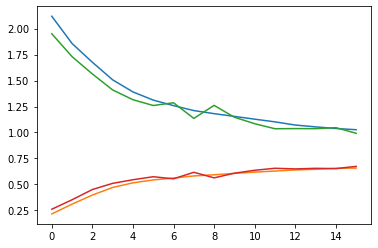

In [ ]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'loss {loss}, accuracy {accuracy}')
# save the model before keras crashes due to OOM 
# (quite common with keras which is why i dont like it)
model.save(f'trained_{accuracy:.5f}_cifar10.h5')
# fix for keras fit() OOM: https://stackoverflow.com/a/63119172


loss 1.0051265954971313, accuracy 0.6672000288963318


In [ ]:
# use this to load model from saved state
# model.load_weights('trained_0.123_cifar10.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


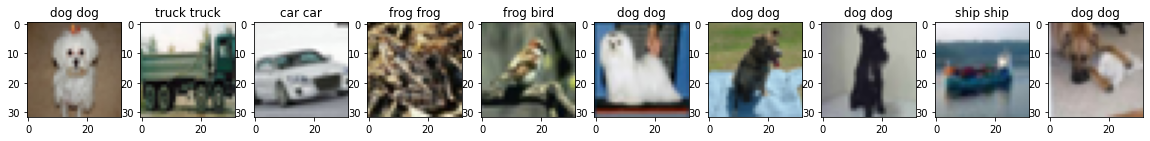

In [ ]:
# view some random tests
start = np.random.randint(len(x_test)-10)
pred = model.predict_classes(x_test)[start:start+10]
fig, axs = plt.subplots(1, 10, figsize=(20,10))
for i in range(10):
  axs[i].imshow(x_test[start+i])
  axs[i].set_title(f'{classes[pred[i]]} {classes[np.argmax(y_test[start+i])]}')


In [ ]:
confused = confusion_matrix(y_test.argmax(axis=1), model.predict_classes(x_test))
print(confused)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[715  19  67  16  17  11   6  14  79  56]
 [ 27 727   4  11   1  10   8   7  16 189]
 [ 72   6 521  69 106 111  56  31  11  17]
 [ 14  11  80 501  68 202  37  46  13  28]
 [ 27   4 126  72 572  39  37 111   9   3]
 [ 16   3  67 165  42 628  11  50   5  13]
 [  0   3  68 101  66  33 704   9   4  12]
 [ 15   0  36  39  64  96   4 721   3  22]
 [ 95  31  26  16   7  16   6   8 748  47]
 [ 31  46  10  13   8   9   5  17  26 835]]


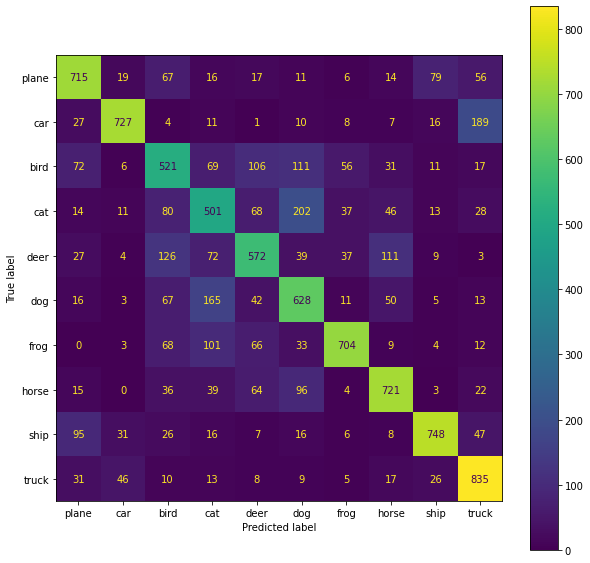

In [ ]:
# A useful tool to see how well the network is performing
# and where we need to focus our efforts into improving the
# model or the dataset or the preprocessing steps
confusedplot = ConfusionMatrixDisplay(confused, display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
confusedplot.plot(ax=ax, values_format='d')

In [ ]:
!wget "https://ichef.bbci.co.uk/news/976/cpsprodpb/11E7/production/_117738540_066475707.jpg" -O suez0.jpg
!wget "https://static.vesselfinder.net/ship-photo/9811000-353136000-ce939b7d94cba3939b8822079df7ccf1/1" -O suez1.jpg
!ls



--2021-04-20 08:49:27--  https://ichef.bbci.co.uk/news/976/cpsprodpb/11E7/production/_117738540_066475707.jpg
Resolving ichef.bbci.co.uk (ichef.bbci.co.uk)... 23.67.240.199, 2600:1407:a800:1a6::f33, 2600:1407:a800:193::f33, ...
Connecting to ichef.bbci.co.uk (ichef.bbci.co.uk)|23.67.240.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99339 (97K) [image/jpeg]
Saving to: ‘suez0.jpg’

suez0.jpg           100%[===================>]  97.01K  --.-KB/s    in 0.08s   

2021-04-20 08:49:27 (1.25 MB/s) - ‘suez0.jpg’ saved [99339/99339]

--2021-04-20 08:49:27--  https://static.vesselfinder.net/ship-photo/9811000-353136000-ce939b7d94cba3939b8822079df7ccf1/1
Resolving static.vesselfinder.net (static.vesselfinder.net)... 195.201.71.220, 2a01:4f8:251:58ac::2
Connecting to static.vesselfinder.net (static.vesselfinder.net)|195.201.71.220|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77285 (75K) [image/jpeg]
Saving to: ‘suez1.jpg’

suez1.jpg     

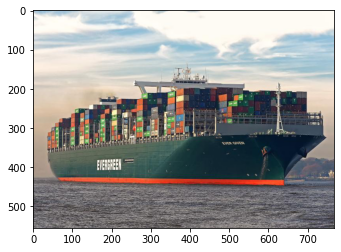

In [ ]:
import PIL
suez = PIL.Image.open('suez1.jpg')
plt.imshow(suez)


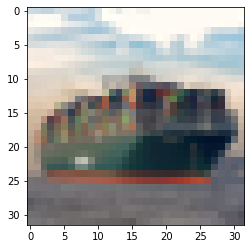

In [ ]:
suez = suez.resize(input_shape[:2])
suez = np.array(suez) / 255
suez = np.array([suez])
plt.imshow(suez[0])


In [ ]:
print(suez.shape)


(1, 32, 32, 3)


In [ ]:
print(f"{classes[np.argmax(model.predict(suez)[0])]} {np.max(model.predict(suez)[0])}")

ship 0.9359347224235535


In [ ]:
layer_outputs = [layer.output for layer in model.layers[:5]]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)
activation_model.summary()
activations = activation_model.predict(suez)
print(activations[0].shape)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 256)       7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
Total params: 302,208
Trainable params: 302,208
Non-trainable params: 0
_______________________________________________________

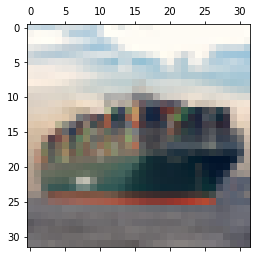

In [ ]:
plt.matshow(suez[0])


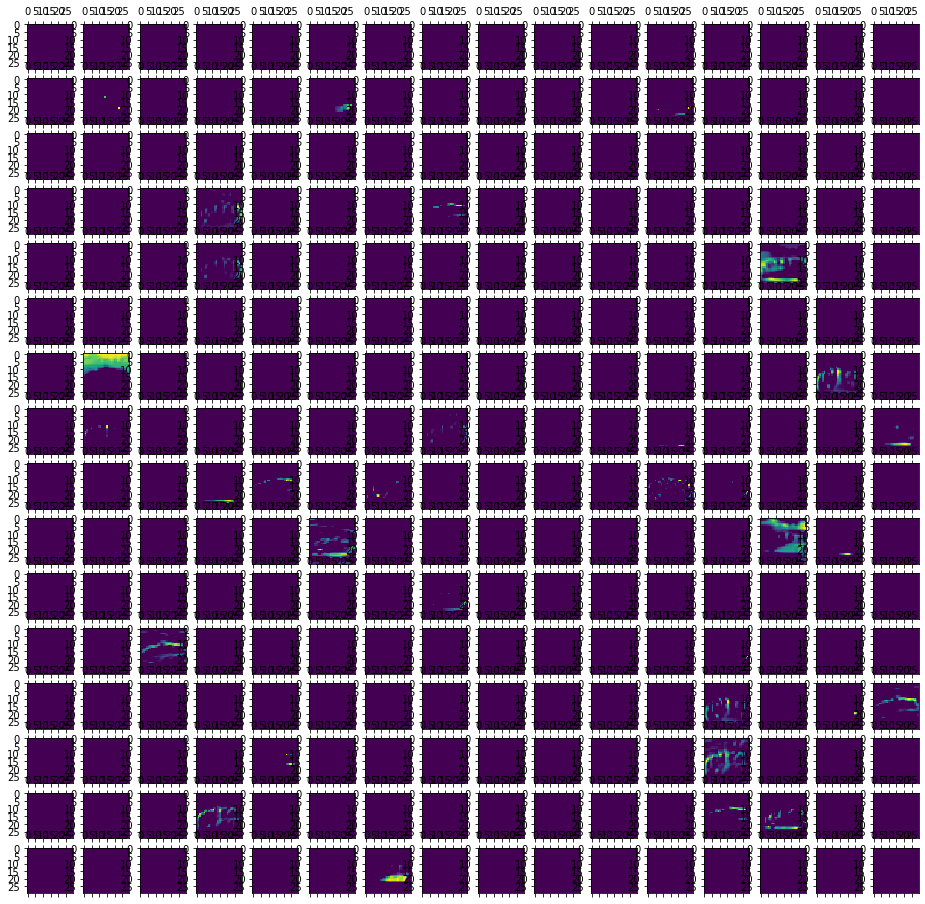

In [ ]:
fig, axs = plt.subplots(16, 16, figsize=(16, 16))
for i in range(len(axs)):
  for j in range(len(axs[i])):
    axs[i][j].matshow(activations[0][0, :, :, i*len(axs) + j])
